# Week3 Tutorial 
- How to use Jupyter Lab (Python Notebook) 
- Descriptive Statistics on freshman_kgs.csv (https://people.sc.fsu.edu/~jburkardt/data/csv/csv.html) 
    - Sex, September weight (kgs), April weight (kgs), September BMI, April BMI, for 67 college freshmen. There is also an initial header line.

## Reading the CSV file 

In [168]:
import csv
# Basic method. We can shorten the above commands
csvFile = open("freshman_kgs.csv","r")
csvReader = csv.reader(csvFile)
header = next(csvReader)
records = []
for record in csvReader:
    records.append(record)
    
# Advanced method. We can shorten the above commands
# csvReader = csv.reader(open("freshman_kgs.csv","r"))   # Create a csv reader with a file object (just created)
# header = next(csvReader)   #  Getting the first line (and the cursor moves to the second line)
# records = [record for record in csvReader]  # records is a list that simply contains every record in csvReader as-is

## Check data types and basic cleaning needed  

In [169]:
print(header)  # Header need to be stripped

['Sex', ' "Weight (Sep)"', ' "Weight (Apr)"', ' "BMI (Sep)"', ' "BMI (Apr)"']


In [170]:
print (records) # Except the first column 'Sex', numeric values need to be converted to number

[['M', ' 72', ' 59', ' 22.02', ' 18.14'], ['M', ' 97', ' 86', ' 19.70', ' 17.44'], ['M', ' 74', ' 69', ' 24.09', ' 22.43'], ['M', ' 93', ' 88', ' 26.97', ' 25.57'], ['F', ' 68', ' 64', ' 21.51', ' 20.10'], ['M', ' 59', ' 55', ' 18.69', ' 17.40'], ['F', ' 64', ' 60', ' 24.24', ' 22.88'], ['F', ' 56', ' 53', ' 21.23', ' 20.23'], ['F', ' 70', ' 68', ' 30.26', ' 29.24'], ['F', ' 58', ' 56', ' 21.88', ' 21.02'], ['F', ' 50', ' 47', ' 17.63', ' 16.89'], ['M', ' 71', ' 69', ' 24.57', ' 23.85'], ['M', ' 67', ' 66', ' 20.68', ' 20.15'], ['F', ' 56', ' 55', ' 20.97', ' 20.36'], ['F', ' 70', ' 68', ' 27.30', ' 26.73'], ['F', ' 61', ' 60', ' 23.30', ' 22.88'], ['F', ' 53', ' 52', ' 19.48', ' 19.24'], ['M', ' 92', ' 92', ' 24.74', ' 24.69'], ['F', ' 57', ' 58', ' 20.69', ' 20.79'], ['M', ' 67', ' 67', ' 20.49', ' 20.60'], ['F', ' 58', ' 58', ' 21.09', ' 21.24'], ['F', ' 49', ' 50', ' 18.37', ' 18.53'], ['M', ' 68', ' 68', ' 22.40', ' 22.61'], ['F', ' 69', ' 69', ' 28.17', ' 28.43'], ['M', ' 87', ' 

In [173]:
# clean the header and make it ['Sex', 'Weight (Sep)', 'Weight (Apr)', 'BMI (Sep)', 'BMI (Apr)']
# headerCleaned = []
# for h in header:
#     headerCleaned.append(h.strip('" '))
# print(headerCleaned)
# header = headerCleaned

# Optional. We can shorten the code above using Python's list comprehension
header = [h.strip('" ') for h in header]
print(header)

['Sex', 'Weight (Sep)', 'Weight (Apr)', 'BMI (Sep)', 'BMI (Apr)']


In [176]:
# clean the records so that columns (except Sex) contain numbers
# recordsCleaned = []
# for row in records:
#     rowCleaned = []
#     for colIndex, col in enumerate(row):
#         if colIndex == 0:
#             rowCleaned.append(col)
#         else:
#             rowCleaned.append(float(col))
#     recordsCleaned.append(rowCleaned)
# print (recordsCleaned)
# records = recordsCleaned

# Optional 1. Shorten the above code a little
# recordsCleaned = []
# for row in records:
#     rowCleaned = [col if colIndex == 0 else float(col) for colIndex, col in enumerate(row)]
#     recordsCleaned.append(rowCleaned)
# print (recordsCleaned)
# records = recordsCleaned


# Optional 2. We can even the code above to 1-line using Python's list comprehension
records = [[col if colIndex==0 else float(col) for colIndex, col in enumerate(row)] for row in records]
print(records)

[['M', 72.0, 59.0, 22.02, 18.14], ['M', 97.0, 86.0, 19.7, 17.44], ['M', 74.0, 69.0, 24.09, 22.43], ['M', 93.0, 88.0, 26.97, 25.57], ['F', 68.0, 64.0, 21.51, 20.1], ['M', 59.0, 55.0, 18.69, 17.4], ['F', 64.0, 60.0, 24.24, 22.88], ['F', 56.0, 53.0, 21.23, 20.23], ['F', 70.0, 68.0, 30.26, 29.24], ['F', 58.0, 56.0, 21.88, 21.02], ['F', 50.0, 47.0, 17.63, 16.89], ['M', 71.0, 69.0, 24.57, 23.85], ['M', 67.0, 66.0, 20.68, 20.15], ['F', 56.0, 55.0, 20.97, 20.36], ['F', 70.0, 68.0, 27.3, 26.73], ['F', 61.0, 60.0, 23.3, 22.88], ['F', 53.0, 52.0, 19.48, 19.24], ['M', 92.0, 92.0, 24.74, 24.69], ['F', 57.0, 58.0, 20.69, 20.79], ['M', 67.0, 67.0, 20.49, 20.6], ['F', 58.0, 58.0, 21.09, 21.24], ['F', 49.0, 50.0, 18.37, 18.53], ['M', 68.0, 68.0, 22.4, 22.61], ['F', 69.0, 69.0, 28.17, 28.43], ['M', 87.0, 88.0, 23.6, 23.81], ['M', 81.0, 82.0, 26.52, 26.78], ['M', 60.0, 61.0, 18.89, 19.27], ['F', 52.0, 53.0, 19.31, 19.75], ['M', 70.0, 71.0, 20.96, 21.32], ['F', 63.0, 64.0, 21.78, 22.22], ['F', 56.0, 57.0,

## Getting a column 

### via column index number 

In [177]:
ci = 0
firstColumn = [r[ci] for r in records]  # firstColumn := a list of ci-th element of every record 
print(firstColumn)

['M', 'M', 'M', 'M', 'F', 'M', 'F', 'F', 'F', 'F', 'F', 'M', 'M', 'F', 'F', 'F', 'F', 'M', 'F', 'M', 'F', 'F', 'M', 'F', 'M', 'M', 'M', 'F', 'M', 'F', 'F', 'M', 'M', 'F', 'M', 'M', 'F', 'F', 'F', 'F', 'M', 'M', 'M', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'M', 'M', 'M', 'M', 'F', 'F', 'F', 'M', 'M', 'F', 'M', 'F', 'M', 'M', 'F', 'M', 'M']


### via column title

In [184]:
# columnWeightSep = [r[ci] for r in records]
# print(columnWeightSep)

# optional. 
columnWeightSep = [r[header.index("Weight (Sep)")] for r in records]
print(columnWeightSep)

[72.0, 97.0, 74.0, 93.0, 68.0, 59.0, 64.0, 56.0, 70.0, 58.0, 50.0, 71.0, 67.0, 56.0, 70.0, 61.0, 53.0, 92.0, 57.0, 67.0, 58.0, 49.0, 68.0, 69.0, 87.0, 81.0, 60.0, 52.0, 70.0, 63.0, 56.0, 68.0, 68.0, 54.0, 80.0, 64.0, 57.0, 63.0, 54.0, 56.0, 54.0, 73.0, 77.0, 63.0, 51.0, 59.0, 65.0, 53.0, 62.0, 55.0, 74.0, 74.0, 64.0, 64.0, 57.0, 64.0, 60.0, 64.0, 66.0, 52.0, 71.0, 55.0, 65.0, 75.0, 42.0, 74.0, 94.0]


## Let's make a dictionary of columns

In [185]:
colDict = {}
for ct in header:
    ci = header.index(ct)
    colDict[ct] = [r[ci] for r in records]
print(colDict["BMI (Apr)"])

[18.14, 17.44, 22.43, 25.57, 20.1, 17.4, 22.88, 20.23, 29.24, 21.02, 16.89, 23.85, 20.15, 20.36, 26.73, 22.88, 19.24, 24.69, 20.79, 20.6, 21.24, 18.53, 22.61, 28.43, 23.81, 26.78, 19.27, 19.75, 21.32, 22.22, 20.23, 22.82, 23.19, 20.69, 22.57, 20.76, 22.93, 24.67, 19.34, 22.58, 19.72, 26.72, 29.53, 22.79, 19.28, 20.63, 24.1, 21.91, 23.81, 23.42, 21.34, 21.36, 20.77, 22.31, 25.11, 24.29, 20.9, 19.83, 22.97, 19.42, 23.87, 23.81, 24.45, 25.8, 17.74, 25.33, 40.86]


## Descriptive Statistics
We have done cleaning a CSV file, and formatted to a column dictionary.  
Let's run some basic statistical analysis on column 1 and 2. The rest are same as column 2.

### Column 1. Sex
The first column seems to have only two nominal values "M" for male and "F" for female students. As explained in the lecture, nominal values allow equality check, and frequency counting. Let's answer the following questions.   
- How many records in it?  
- How many unique (distinct) values exist? 
- How frequently does each value appear? 
- Is the dataset imbalanced? (i.e. does one value appear much more frequently than the other?) 
> We could use "Chi-Square Goodness of Fit" test, but let's skip for now.

In [186]:
print ("How many records in it?", len(colDict["Sex"]))

genderDict = {}
for v in colDict["Sex"]:
    if v not in genderDict.keys():
        genderDict[v] = 0
    genderDict[v] = genderDict[v] + 1    
print ("How many unique (distinct) values exist?", len(genderDict.keys()))
print ("How frequently does each value appear?")
for gender, freq in genderDict.items():
    print ("\t", gender, "appear", freq, "times")
print ("Is the dataset imbalanced?") 

How many records in it? 67
How many unique (distinct) values exist? 2
How frequently does each value appear?
	 M appear 32 times
	 F appear 35 times
Is the dataset imbalanced?


### Column 2. Weight (Sep)
The second column seems to have ratio values - weights of students. As explained in the lecture, ratio values allow almost any operations. Let's answer the following questions.   
- What is the central tendency?  For ratio values, we calculate mean and median. However we cannot run mode unless we round them off (i.e. making them discrete numbers) or putting into bins (i.e. histogram).   
- What is the degree of variation? We can calculate standard deviation. 
- Find min and max.
- Is it a normal distribution?  
- Is it skewed? What about kurtosis? 
- Is there any outlier?

In [187]:
weights = colDict["Weight (Sep)"]   # Putting the column in a temporary variable for brevity 

print ("What is the central tendency?")
mean = sum(weights) / len(weights)
median = sorted(weights)[round(len(weights)/2)] # sort the list, and then pick the middle one
print ("\t MEAN:",mean, "\t MEDIAN:", median)

import math
print ("What is the degree of variation?")
squaredDeviation = sum([(w-mean)**2 for w in weights])
variance = squaredDeviation / len(weights)
stdev = math.sqrt(variance)
print ("\t STDEV:", stdev)

print ("Find min and max")
print ("\t MIN:",min(weights), "\t MAX:",max(weights))

# print ("Is it a normal distribution?") 
# print ("Is it skewed? What about kurtosis?")

# print ("It there any outlier?") <- This is a bit tricky without further study on statistics. 
# Instead we can try a histogram
bins = [40,50,60,70,80,90]  
histogram = {b:0 for b in bins}   # key: lower bound of the bin, value: frequence
for b in bins:
    lower_bound = b
    upper_bound = b+10
    for w in weights:
        if w >= lower_bound and w < upper_bound:
            histogram[b] = histogram[b] + 1
print (histogram)
for b,f in histogram.items():
    print (b, "*"*f)

What is the central tendency?
	 MEAN: 65.05970149253731 	 MEDIAN: 64.0
What is the degree of variation?
	 STDEV: 11.200853641528978
Find min and max
	 MIN: 42.0 	 MAX: 97.0
{40: 2, 50: 22, 60: 23, 70: 13, 80: 3, 90: 4}
40 **
50 **********************
60 ***********************
70 *************
80 ***
90 ****


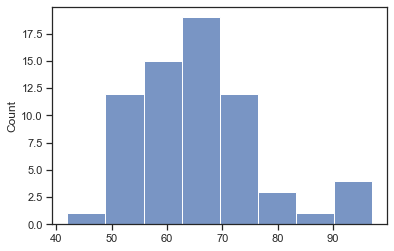

In [188]:
# Let's draw histogram using seaborn
# Don't bother how we drew it yet. We will learn data visualization ssoon.
import seaborn as sns
ax = sns.histplot(weights)